# Sleep and Healthy LifeStyle


# Dataset Overview:

**Sleep Health and Lifestyle Dataset**

**Key Dataset Columns:**

1. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
2. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
3. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
4. BMI Category: The BMI category of the person (Underweight, Normal, Overweight).
5. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
6. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
7. Daily Steps: The number of steps the person takes per day.
8. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

**Details about Sleep Disorder Column:**

- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.columns

Index(['gender', 'age', 'occupation', 'sleep_dur', 'sleep_q', 'phys_act',
       'stress', 'bmi', 'hr', 'steps', 'sleep_dis', 'pressure_h', 'pressure_l',
       'age_group'],
      dtype='object')

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


# Data preparation

In [ ]:
# dropping unuseful column

df.drop('Person ID',axis=1,inplace=True)

In [ ]:
# rename them for easier to use

df.columns = ['gender', 'age', 'occupation', 'sleep_dur', 'sleep_q', 'phys_act','stress', 'bmi', 'bld_pressure', 'hr', 'steps', 'sleep_dis']

In [ ]:
# spleeting by pressure

df = pd.concat([df, df['bld_pressure'].str.split('/', expand=True)], axis=1).drop(
    'bld_pressure', axis=1)


In [ ]:
df=df.rename(columns={0: 'pressure_h', 1: 'pressure_l'})


In [ ]:
df['pressure_h'] = df['pressure_h'].astype(float)
df['pressure_l'] = df['pressure_l'].astype(float)

# Data Analysis

In [ ]:
# cheking correlation matrix
df.corr(numeric_only=True)

,age,sleep_dur,sleep_q,phys_act,stress,hr,steps,pressure_h,pressure_l
age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
sleep_dur,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
sleep_q,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
phys_act,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
stress,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
hr,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
pressure_h,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
pressure_l,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


<Axes: >

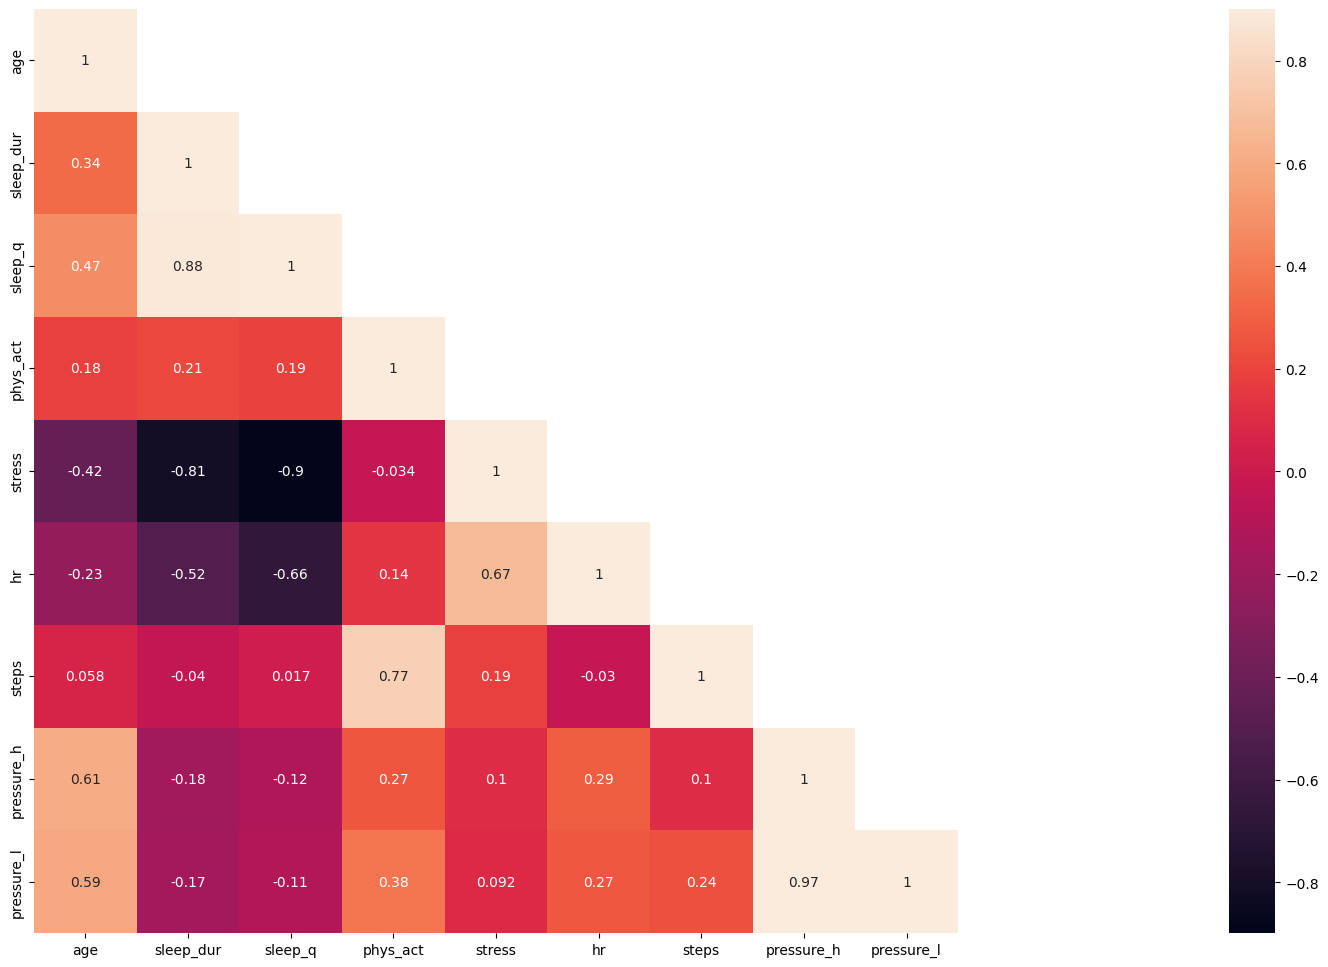

In [ ]:
# Pearson correlation matrix

corr = df.corr(method = 'pearson', numeric_only=True)
mask = np.array(corr)

mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(70,12)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

# Conclusions correlation matrix

Key:

* With more age people tend to have better sleep, which helps reduce stress. Also with age people have higher blood pressure
* We can see correlation between sleep duration and sleep quality. One affects another
* Higher stress corelated with high heart beat, poor quality and duration of sleep
* High heart beat correlated with higher blood pressure, stress and worse quality of sleep
* Physical active people tend to walk more often

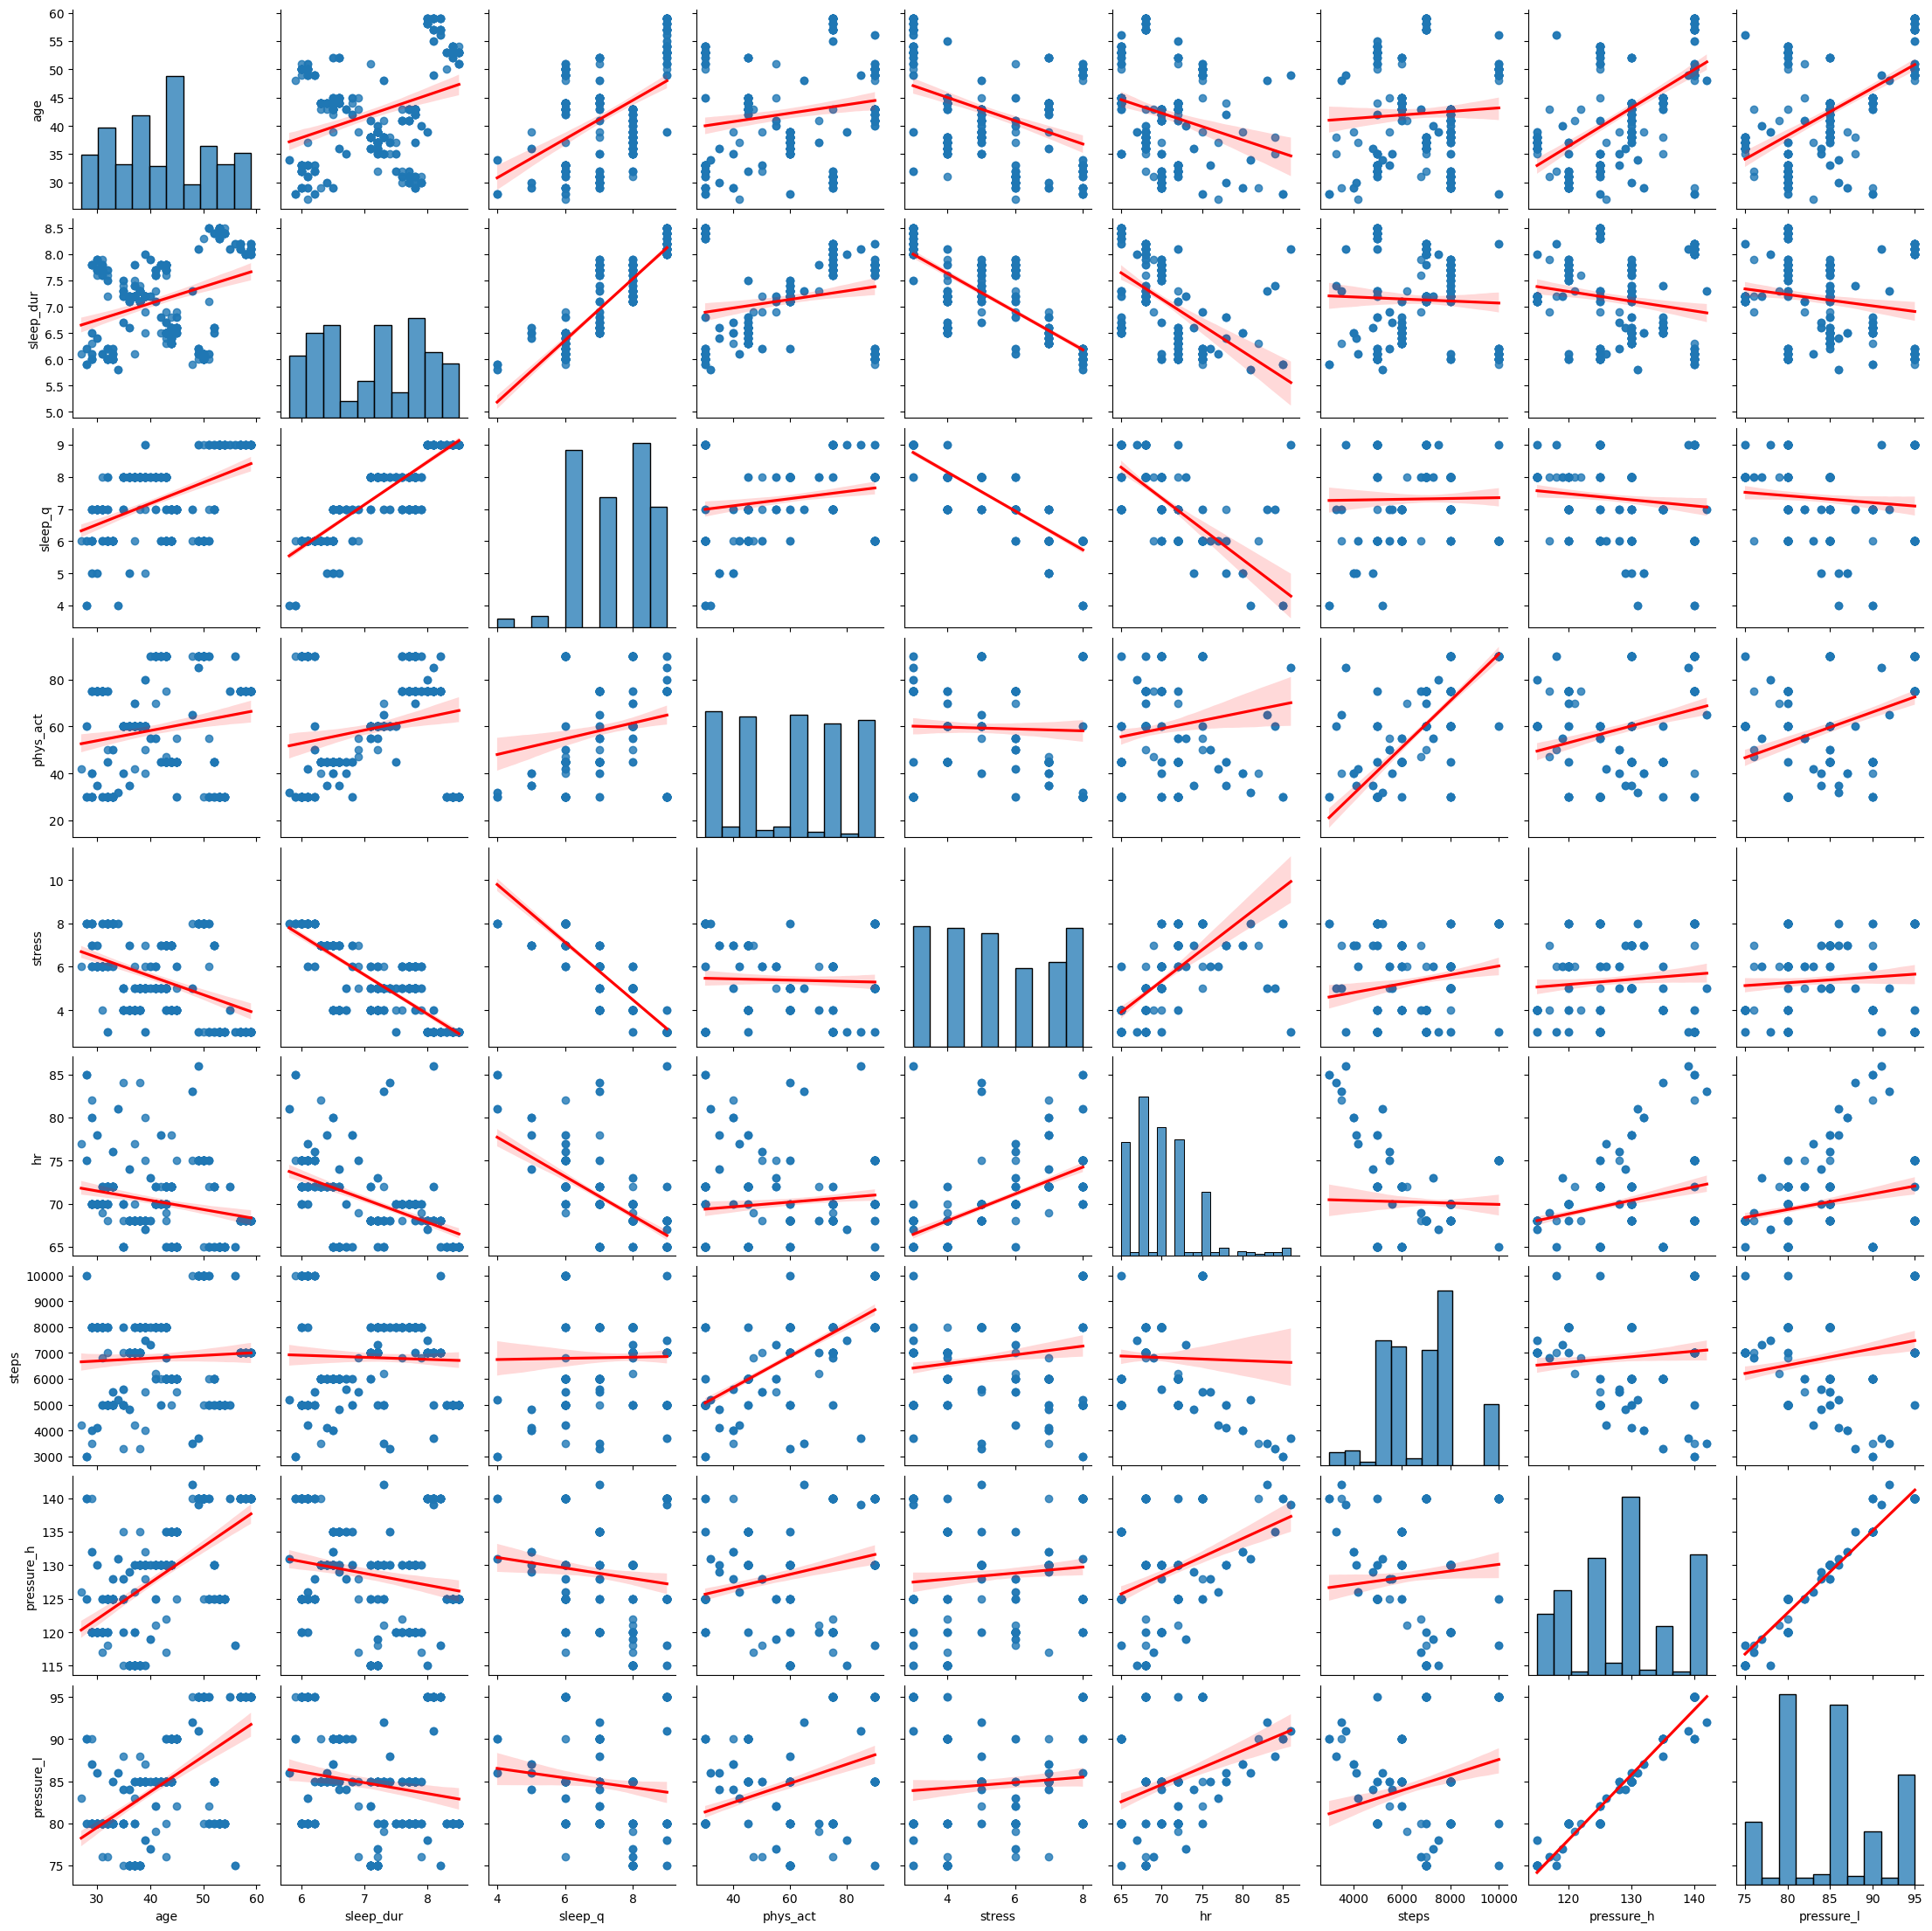

In [ ]:
# let's take closer look making linear regression matrix for each value

sns.pairplot(df, kind='reg', plot_kws={'line_kws': {'color': 'red'}})

Key:

* With bigger age people tend to have better sleep, which helps reduce stress. Also with age people have higher blood pressure
* We can see correlation between sleep duration and sleep quality. One affects another
* Higher stress corelated with high heart beat, poor quality and duration of sleep
* High heart beat correlated with higher blood pressure, stress and worse quality of sleep
* Physical active people tend to walk more often


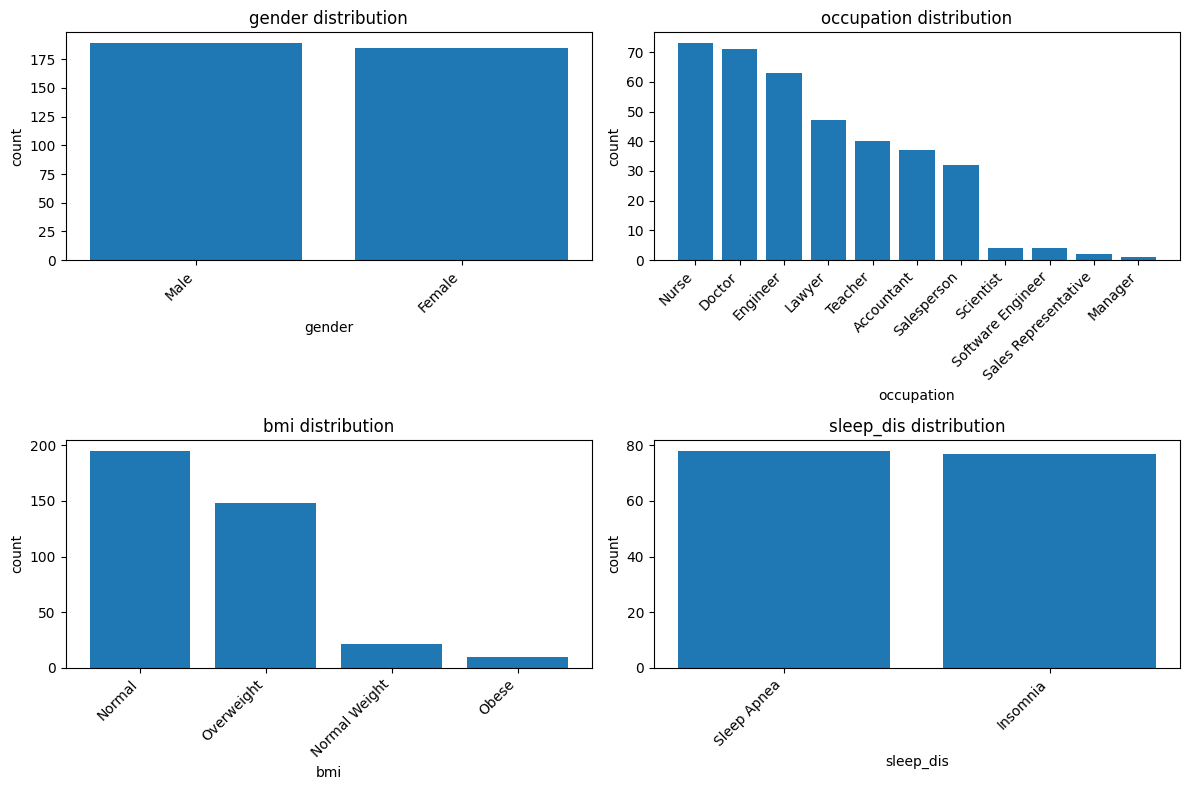

In [ ]:
# Cathegories of interviewed

categories = ['gender', 'occupation', 'bmi', 'sleep_dis']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2

    counts = df[category].value_counts()

    axes[row, col].bar(counts.index, counts)
    axes[row, col].set_title(f'{category} distribution')
    axes[row, col].set_xlabel(category)
    axes[row, col].set_ylabel('count')

    axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


Key:

* Significant amount of interviewed have overweight
* Third of the interviewed have trouble or lack of sleep

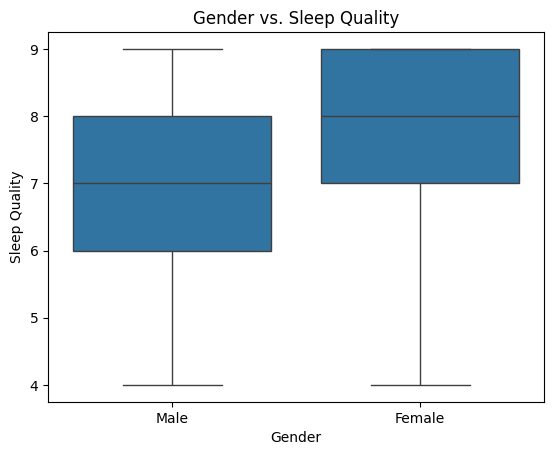

In [ ]:
# Let's find the reason, why Male have more stress
# Starting with quality of sleep

sns.boxplot(data=df, x='gender', y='sleep_q')

plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.title('Gender vs. Sleep Quality')

plt.show()


Key:

* Females have better sleep quality than males, which could be reason why women are less stressed

# Research in stress level

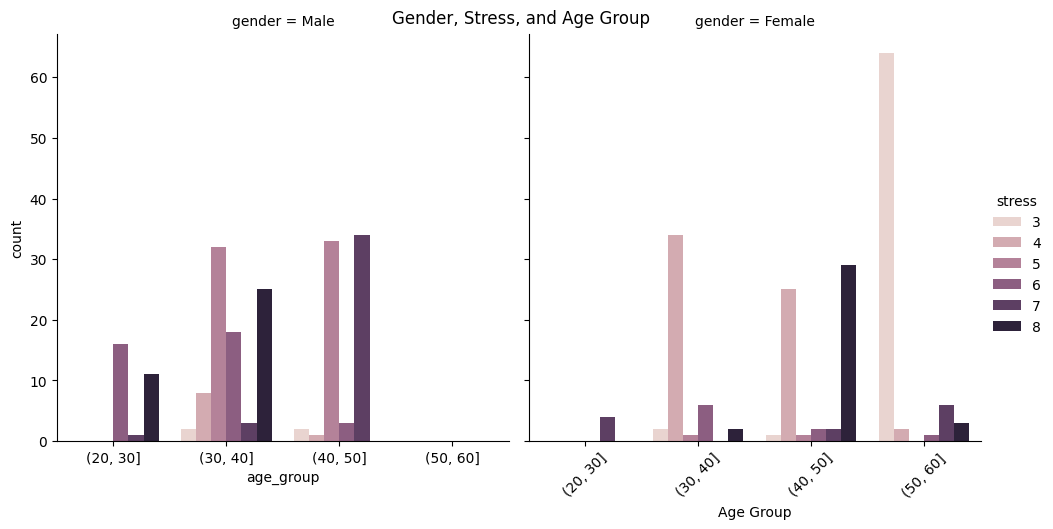

In [ ]:
# Lets look at stress level by age and gender

age_groups = [20, 30, 40, 50, 60]
df['age_group'] = pd.cut(df['age'], bins=age_groups)

sns.catplot(data=df, x='age_group', hue='stress', col='gender', kind='count')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.suptitle('Gender, Stress, and Age Group')
plt.xticks(rotation=45)
plt.show()

Key:

Males

* Men en their 20s feel under a lot of stress
* In their 30s dispersion of stress level is wider
* In their 40s they are pretty equal between normal and high level of stress

Females

* young women also feel under stress
* Much easier at their 30s
* Strong dividness between easiness and very high stress in their 40s
* Significally less stressed in their 50s

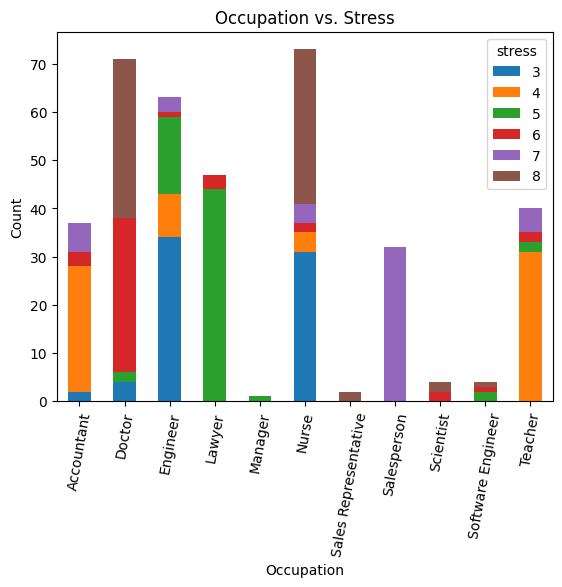

In [ ]:
# Look closely to stress level by profession

occupation_stress = pd.crosstab(df['occupation'], df['stress'])
occupation_stress.plot(kind='bar', stacked=True)

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation vs. Stress')

plt.xticks(rotation=80)
plt.show()


Key:

* Doctors, Salespersons, Scientists and Sales Representatives feel more stressed
* Nurses divided by 2 experience: their job very stressful or not stressful at all
* Lawyers are somewhere in the middle. Their job is not that intense
* Teachers and Accountants and Engineers are feel less stressful

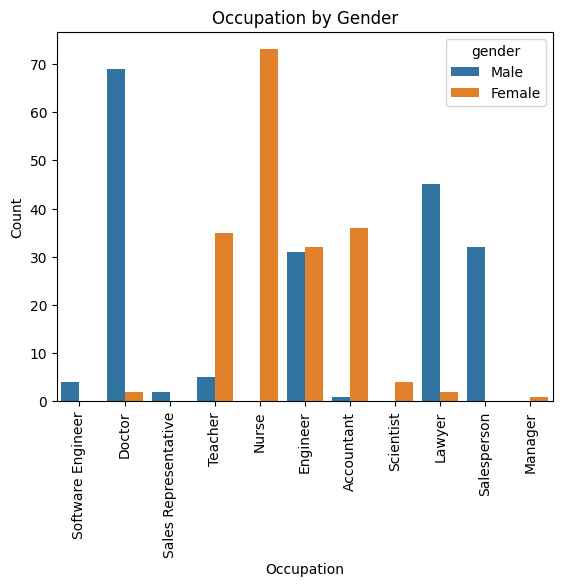

In [ ]:
# Now let's divide occupation by gender to see clearly who deals with stressful professions

sns.countplot(data=df, x='occupation', hue='gender')

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation by Gender')
plt.xticks(rotation=90)
plt.show()

Key:

Stressful professions:

* All salespersons and sales representatives are men
* Almost all doctors and lawyers are men
* All scientists are women

Hense, the most stressful jobs are mostly taken by men.

Less stressful ones:
* Engineers are taken by men and women almost equaly
* Teachers and Accountants are mostly women

Hense, less stressful jobs are taken by women

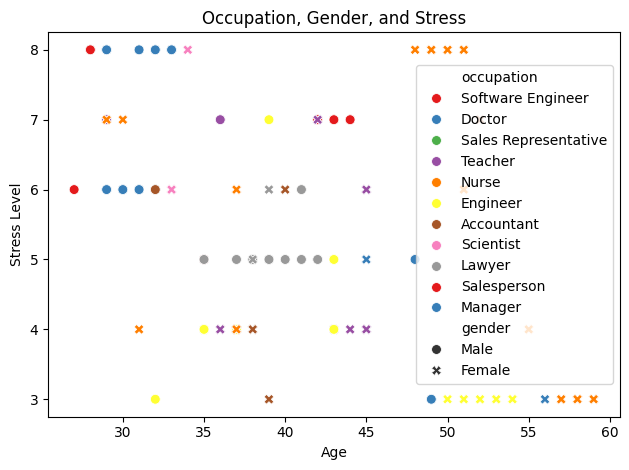

In [ ]:
# extra plot for visualization

sns.scatterplot(data=df, x='age', y='stress', hue='occupation', palette='Set1', style='gender', s=50)

plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title('Occupation, Gender, and Stress')

plt.tight_layout()
plt.show()

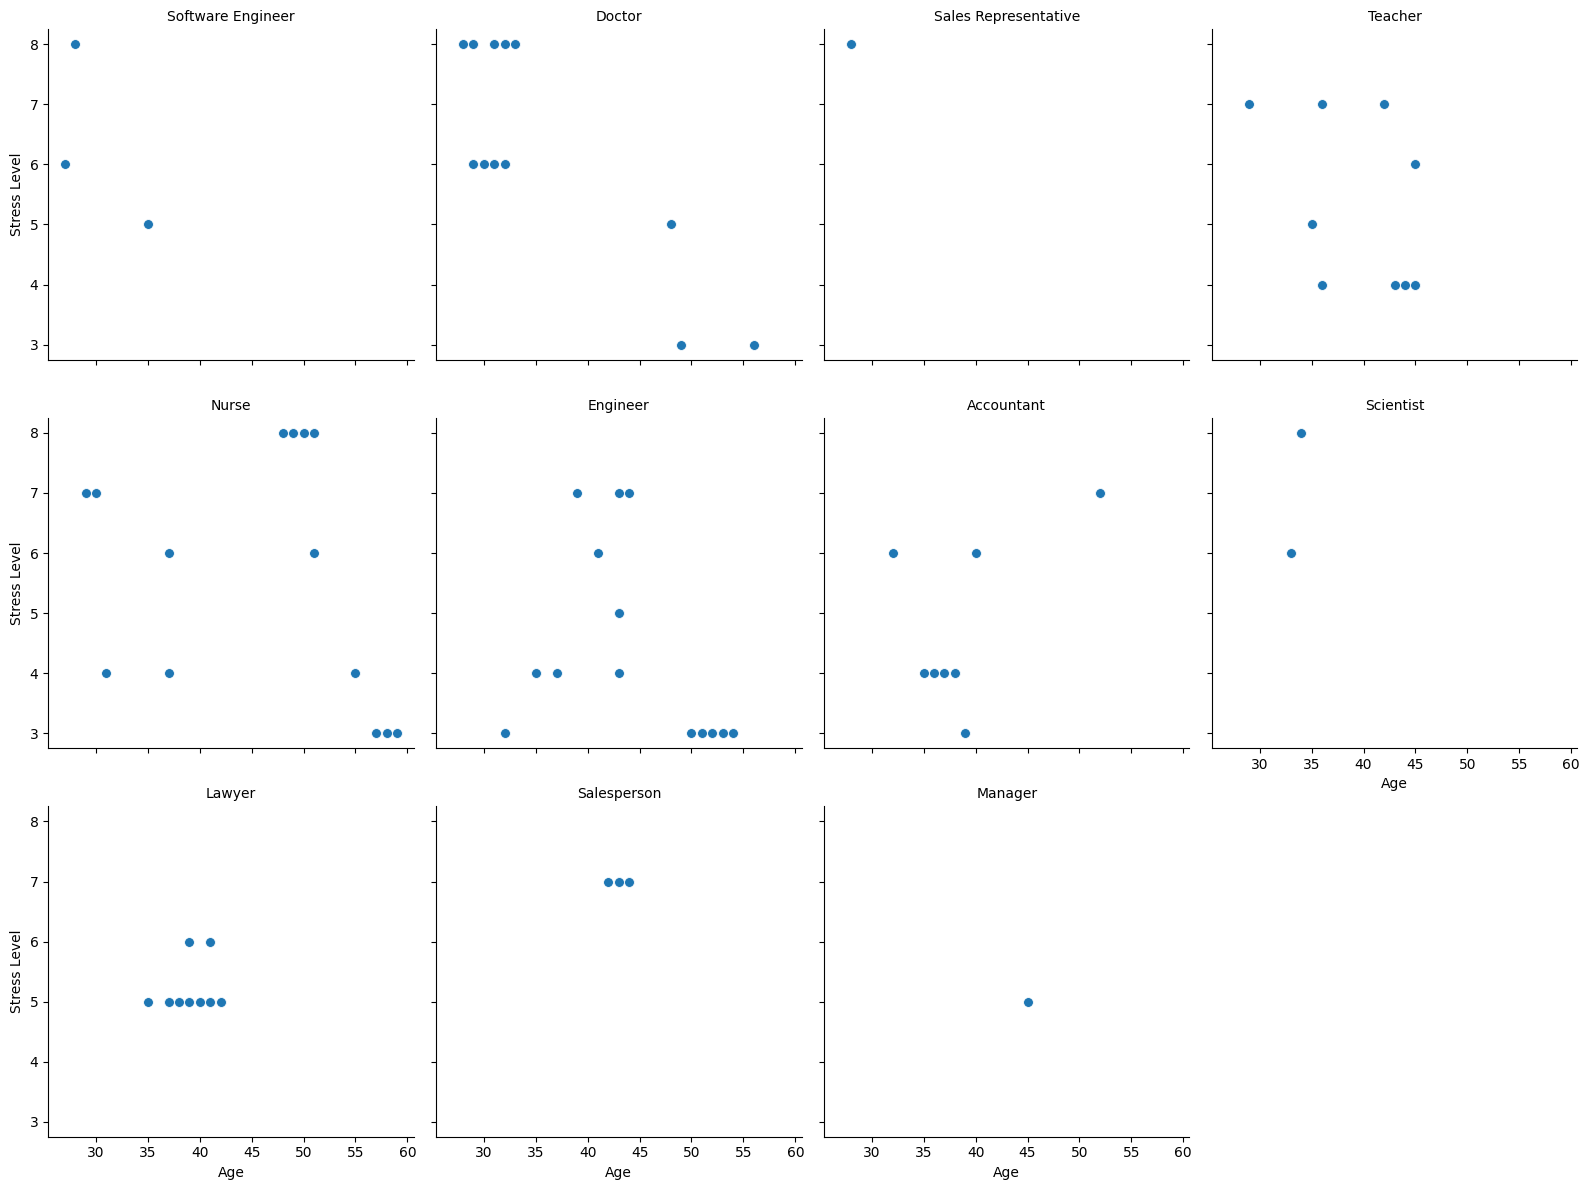

In [ ]:
# Matrix represents each proffesion by age and stress level

grid = sns.FacetGrid(data=df, col='occupation', col_wrap=4, height=4)
grid.map(sns.scatterplot, 'age', 'stress', s=50)

grid.set_axis_labels('Age', 'Stress Level')
grid.set_titles(col_template="{col_name}")

grid.tight_layout()
plt.show()

Key:

* With age doctors, teachers and engineers are less stressed
* Accountants are more stressed with age
* Nurses have different distribution, going down with age, raising at pick near 50 years and then significally go down.

# Simpson's paradox

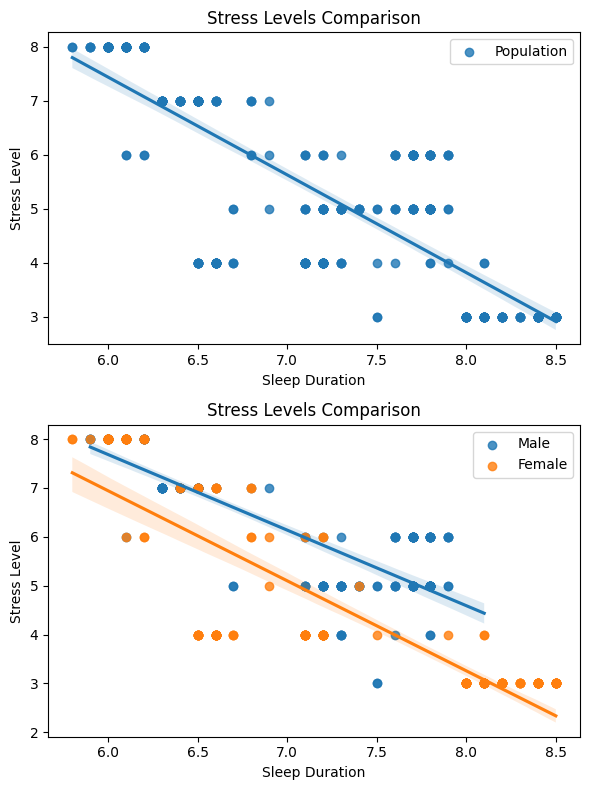

In [ ]:
# Let's divide respondents based on gender & see sleep_duration and stress level trend.

fig, axs = plt.subplots(2, 1, figsize=(6, 8))

sns.regplot(data=df, x='sleep_dur', y='stress', ax=axs[0], label='Population')
axs[0].set_xlabel('Sleep Duration')
axs[0].set_ylabel('Stress Level')
axs[0].set_title('Stress Levels Comparison')
axs[0].legend()

sns.regplot(data=df[df['gender'] == 'Male'], x='sleep_dur', y='stress', ax=axs[1], label='Male')
sns.regplot(data=df[df['gender'] == 'Female'], x='sleep_dur', y='stress', ax=axs[1], label='Female')
axs[1].set_xlabel('Sleep Duration')
axs[1].set_ylabel('Stress Level')
axs[1].set_title('Stress Levels Comparison')
axs[1].legend()

plt.tight_layout()
plt.show()


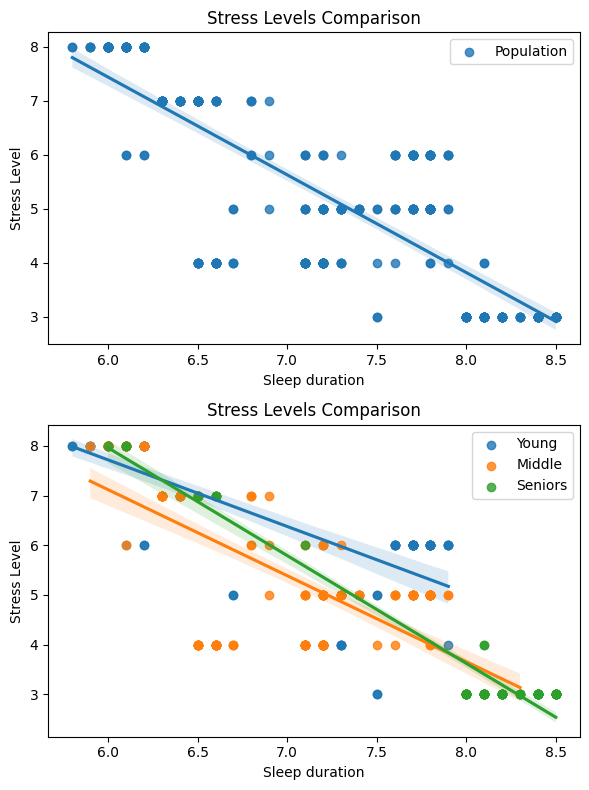

In [ ]:
# Let's divide respondents based on age groups & see sleep_duration and stress level trend.

young = df[(df['age'] >= 20) & (df['age'] <= 35)]
middle_age = df[(df['age'] > 35) & (df['age'] <= 50)]
seniors = df[(df['age'] > 50)]

fig, axs = plt.subplots(2, 1, figsize=(6, 8))

sns.regplot(data=df, x='sleep_dur', y='stress', ax=axs[0], label='Population')
axs[0].set_xlabel('Sleep duration')
axs[0].set_ylabel('Stress Level')
axs[0].set_title('Stress Levels Comparison')
axs[0].legend()

sns.regplot(data=young, x='sleep_dur', y='stress', ax=axs[1], label='Young')
sns.regplot(data=middle_age, x='sleep_dur', y='stress', ax=axs[1], label='Middle')
sns.regplot(data=seniors, x='sleep_dur', y='stress', ax=axs[1], label='Seniors')

axs[1].set_xlabel('Sleep duration')
axs[1].set_ylabel('Stress Level')
axs[1].set_title('Stress Levels Comparison')
axs[1].legend()

plt.tight_layout()
plt.show()


**Absence of Trend reversal: What does it suggest ?**

# Prediction

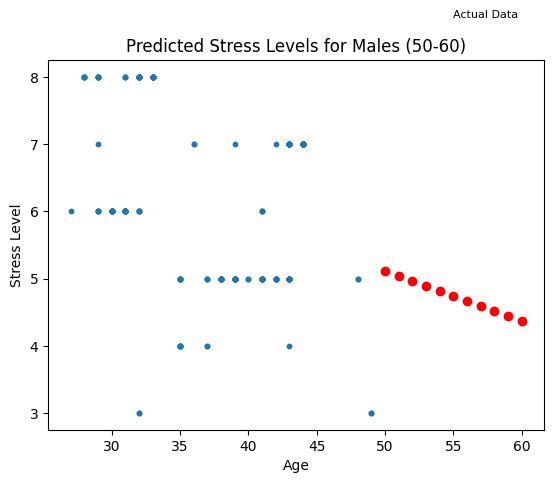

In [ ]:
male_data = df[df['gender'] == 'Male']
age_values = male_data['age'].values
stress_levels = male_data['stress'].values

plt.scatter(age_values, stress_levels, label='Actual Data', s=10)

for age in range(50, 61):
    X = age_values.reshape(-1, 1)
    y = stress_levels
    model = LinearRegression()
    model.fit(X, y)

    new_age_values = np.array([[age]])
    predicted_stress_level = model.predict(new_age_values)

    plt.scatter(new_age_values, predicted_stress_level, color='red')

plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title('Predicted Stress Levels for Males (50-60)')

# Add the list of actual data as a text annotation
actual_data_text = 'Actual Data'
plt.text(55, 9, actual_data_text, fontsize=8, verticalalignment='top')

plt.show()


Key:

* As for women, men with age are more likely to experience less stress with age

## Conclusions

1. **Stress vs age:** Stress is high in the 20s, spreads out in the 30s, often rises in the 40s, and drops after ~50 (the decline is clearer for women).
2. **Gender & sleep:** Women report **better sleep quality** and, correspondingly, slightly **lower stress**; once you consider age and job, gender gaps are small.
3. **Occupation:** **Doctors, sales/sales-rep, and scientists** show higher stress; **teachers, accountants, engineers** are lower; **nurses** are split with a midlife peak then decline.
4. **Sleep & health:** Better/longer sleep is generally associated with **lower stress** and **lower blood pressure** across groups.
5. **Caution:** This is a small sample; we did **not** find a consistent Simpson’s paradox—faceting by age, job, or sleep disorder changes magnitudes more than direction.


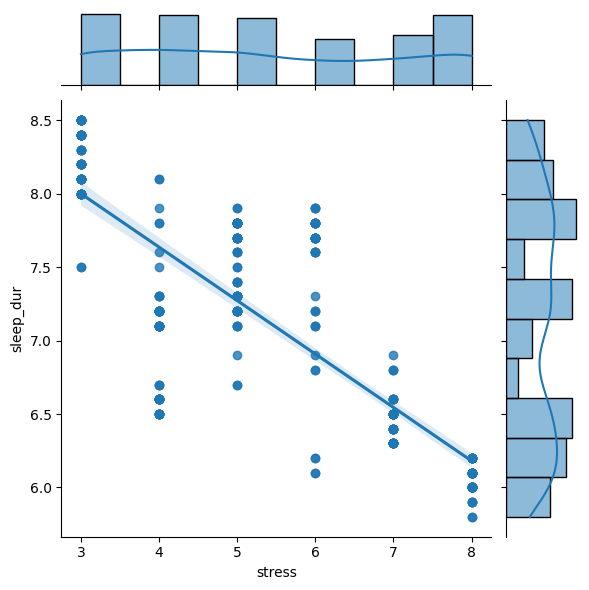

In [ ]:
sns.jointplot(data=df, x="stress", y="sleep_dur", kind="reg")  # or kind="kde"


<Axes: xlabel='sleep_dur', ylabel='Proportion'>

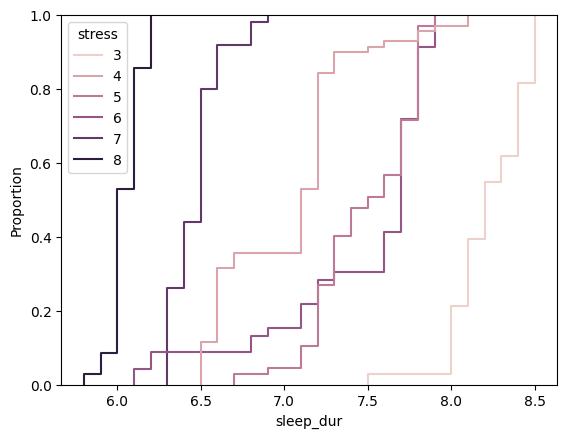

In [ ]:
sns.ecdfplot(data=df, x="sleep_dur", hue="stress")


<Axes: xlabel='stress', ylabel='sleep_dur'>

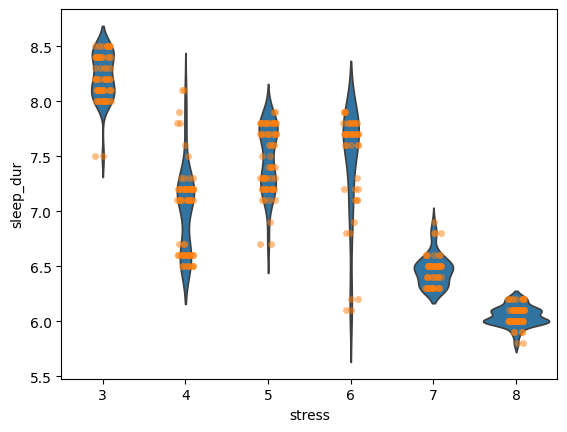

In [ ]:
sns.violinplot(data=df, x="stress", y="sleep_dur", inner=None)
sns.stripplot(data=df, x="stress", y="sleep_dur", alpha=0.5)


<Axes: xlabel='stress', ylabel='sleep_dur'>

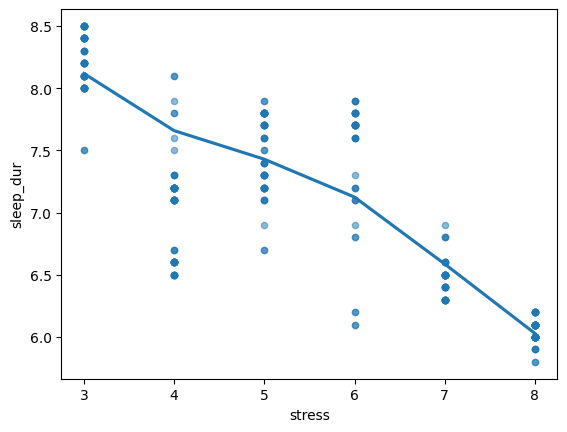

In [ ]:
sns.regplot(data=df, y="stress", x="sleep_dur", lowess=True, scatter_kws={"alpha":0.5, "s":20})